# Теплов Андрей 10 Р

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from tqdm.notebook import tqdm
from sklearn.model_selection import cross_val_predict
from matplotlib import pyplot as plt
import pickle
import seaborn as sns

In [6]:
data = pd.read_csv('/content/drive/MyDrive/School_10R/data_4class.csv', sep = ';',decimal=',')
data = data.dropna()
data.head(20)

,x1,x2,x3,x4,x5,x6,class
0,4.515298,-2.070367,3.258538,3.793059,3.472048,-0.478920,3
1,1.550879,1.382015,1.942693,2.069886,-0.225112,-2.303950,2
2,2.988097,-2.136576,2.469955,1.725206,2.971664,-2.543173,3
3,3.139768,-1.677146,4.138218,2.521013,2.650714,-0.362622,3
4,3.119780,-2.100747,3.699075,2.046173,2.999092,-1.675296,3
6,4.259244,-2.803686,2.312819,2.692819,3.988701,-2.949735,3
10,1.421255,4.228839,4.327395,3.184108,-2.218541,-4.016580,1
11,4.104851,-2.567868,2.058182,2.684427,3.734911,-2.732155,3
14,0.164041,3.801912,-1.150158,1.644127,-2.618709,-3.335997,2
15,3.787919,-2.902474,2.308752,2.024812,3.896940,-3.526737,3


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56432 entries, 0 to 79999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      56432 non-null  float64
 1   x2      56432 non-null  float64
 2   x3      56432 non-null  float64
 3   x4      56432 non-null  float64
 4   x5      56432 non-null  float64
 5   x6      56432 non-null  float64
 6   class   56432 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 3.4 MB


In [21]:
data['class'].value_counts()

3    18872
1    16550
0    11693
2     9317
Name: class, dtype: int64

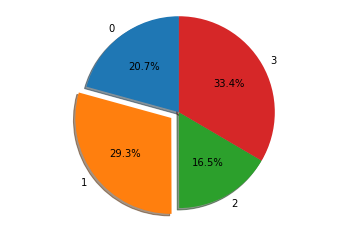

In [27]:
labels = ['0','1','2','3']
fig1, ax1 = plt.subplots()
sizes = [11693, 16550, 9317, 18872]
explode = (0, 0.1, 0, 0)
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

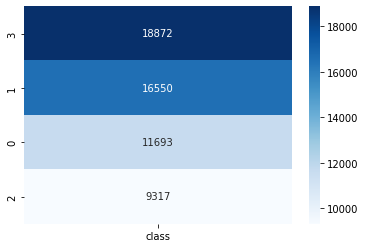

In [53]:
heat_data = pd.DataFrame({"class": [18872, 16550, 11693, 9317]},
                  index=[3, 1, 0, 2])
sns.heatmap(heat_data, annot=True, fmt="g",cmap="Blues")
plt.show()

In [8]:
data.columns

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'class'], dtype='object')

In [9]:
main_col = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6']
target_col = ['class']

In [28]:
x = data[main_col]
y = data[target_col]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(x.values, y.values, 
                                                    train_size=0.8,
                                                    random_state=42,stratify=y)

In [12]:
clf  = RandomForestClassifier(max_depth=13, n_estimators=40,max_features=5)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
randomforest_f1 = f1_score(y_test, pred, average="micro")
print(f"F1 Score: {randomforest_f1}")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


F1 Score: 0.884646052981306


In [15]:
paramentrs={'max_depth':(4,6,9,13),'n_estimators':(30,40,50,100),'max_features':(2,5,8,10)}
clf_grid=RandomForestClassifier()
gsCV=GridSearchCV(clf_grid,paramentrs,verbose=0)
gsCV.fit(X_train,y_train)
# pred=gsCV.predict(x_test)
print(gsCV.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

{'max_depth': 13, 'max_features': 2, 'n_estimators': 50}


In [16]:
clf2 = LogisticRegression(C=10, max_iter=1000,penalty='l2')
clf2.fit(X_train, y_train)
pred = clf2.predict(X_test)
logisticregression_f1 = f1_score(y_test, pred, average="micro")
print(f"F1 Score: {logisticregression_f1}")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Score: 0.871267830247187


In [17]:
clf_grid2 = LogisticRegression(solver='saga')

param_grid = {'C': [10,50,80,100,120],'max_iter': [1000,2000,3000]}
search = GridSearchCV(clf_grid2, param_grid, n_jobs=-1, cv=5, refit=True, scoring='f1')
search.fit(X_train,y_train)
print(search.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  category=UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'C': 10, 'max_iter': 1000}


In [45]:
clf3 = KNeighborsClassifier(n_neighbors=30, weights='uniform', metric='euclidean',leaf_size=10, p=2, n_jobs=4)
clf3.fit(X_train, y_train)
pred = clf3.predict(X_test)
kneighborsclassifier_f1 = f1_score(y_test, pred, average="micro")
print(f"F1 Score: {kneighborsclassifier_f1}")

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


F1 Score: 0.8856206254983608


In [19]:
clf3 = KNeighborsClassifier()
params ={'n_neighbors': np.arange(1,20), 'metric': ['manhattan', 'euclidean'], 'weights':['uniform', 'distance']}

clf_grid3 = GridSearchCV(clf3, params, cv=5, scoring='f1', n_jobs=-1)
clf_grid3.fit(X_train,y_train)
print(clf_grid3.best_params_)

{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan]
  category=UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [20]:
clf4 = DecisionTreeClassifier(max_depth=5, max_features=6,random_state=2)
clf4.fit(X_train, y_train)
pred = clf4.predict(X_test)
decisiontreeclassifier_f1 = f1_score(y_test, pred, average="micro")
# print(pred)
print(f"F1 Score: {decisiontreeclassifier_f1}")

F1 Score: 0.8827855054487463


In [21]:
clf5 = GaussianNB()
clf5.fit(X_train, y_train)
pred = clf5.predict(X_test)
gaussiannbr_f1 = f1_score(y_test, pred, average="micro")
print(gaussiannbr_f1)

0.8749889253123062


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
clf6 = LinearSVC(C=1,intercept_scaling=2, max_iter=2000,
          multi_class='ovr', penalty='l2', tol=0.2)
clf6.fit(X_train, y_train)
pred = clf6.predict(X_test)
linearsvc_f1 = f1_score(y_test, pred, average="micro")
print(linearsvc_f1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.863116860104545


In [23]:
print(f"RandomForest: {randomforest_f1}")
print(f"LogisticRegression: {logisticregression_f1}")
print(f"KneighborsClassifier: {kneighborsclassifier_f1}")
print(f"DecisionTreeClassifier: {decisiontreeclassifier_f1}")
print(f'GaussianNB: {gaussiannbr_f1}')
print(f"LinearSVC: {linearsvc_f1}")
lst=[randomforest_f1,logisticregression_f1,kneighborsclassifier_f1,decisiontreeclassifier_f1,gaussiannbr_f1,linearsvc_f1]
print(f"Лучший скор: {max(lst)}")

RandomForest: 0.884646052981306
LogisticRegression: 0.871267830247187
KneighborsClassifier: 0.8856206254983608
DecisionTreeClassifier: 0.8827855054487463
GaussianNB: 0.8749889253123062
LinearSVC: 0.863116860104545
Лучший скор: 0.8856206254983608


## Сохранение и загрузка модели

In [46]:
pickle.dump(clf3, open('model_task_knc.pkl', 'wb'))

In [47]:
pickled_model = pickle.load(open('model_task_knc.pkl', 'rb'))
pred_final = pickled_model.predict(X_test)
final_predict_f1 = f1_score(y_test, pred_final,  average="micro")
print(pred_final)
print(final_predict_f1)

[3 1 1 ... 1 1 3]
0.8856206254983608


In [48]:
def model_predict(data_test):
    pickled_model = pickle.load(open('file_name.pkl', 'rb'))
    pred = pickled_model.predict(data_test)
    return pred

## Стекинг

In [24]:
def compute_meta_feature(model, X_train, X_test, y_train, cv):
    try:
        train_answers = cross_val_predict(model, X_train, y_train, cv=cv, method='predict')
        model.fit(X_train, y_train)
        return train_answers, model.predict(X_test)
    
    except Exception:
        train_answers = cross_val_predict(model, X_train, y_train, cv=cv, method='predict')
        model.fit(X_train, y_train)
        return train_answers, model.predict(X_test)
    
    

In [25]:
models = []
models.append(RandomForestClassifier(max_depth=13, n_estimators=40,max_features=5))
models.append(LogisticRegression(C=10, max_iter=1000,penalty='l2'))
models.append(KNeighborsClassifier(n_neighbors=10, weights='uniform', metric='manhattan'))
models.append(DecisionTreeClassifier(max_depth=5, max_features=6,random_state=2))
models.append(GaussianNB())

In [26]:
meta_features_train = np.zeros((X_train.shape[0], 0))
meta_features_test = np.zeros((X_test.shape[0], 0))

In [27]:
for model in tqdm(models):
    train, test = compute_meta_feature(model, X_train, X_test, y_train, 5)
    meta_features_train = np.append(meta_features_train, train.reshape((train.size, 1)), axis=1)
    meta_features_test = np.append(meta_features_test, test.reshape((test.size, 1)), axis=1)

  0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:1044: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:1044: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:1044: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:1044: DataConversionWarning: A column-vector y was passed whe

In [28]:
stacking_model = LogisticRegression()
stacking_model.fit(meta_features_train, y_train)

y_train_predicted = stacking_model.predict(meta_features_train)
y_test_predicted = stacking_model.predict(meta_features_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [29]:
train_auc = f1_score(y_train, y_train_predicted,average="micro")
test_auc = f1_score(y_test, y_test_predicted,average="micro")
print(train_auc)
print(test_auc)

0.8864104551999112
0.8840258704704528


## Catboost

In [32]:
!pip install catboost
from catboost import CatBoostClassifier

     |████████████████████████████████| 76.1 MB 1.3 MB/s 


In [ ]:
boost_model = CatBoostClassifier(n_estimators=600,logging_level='Silent',depth=10,learning_rate = 0.04,random_seed=200)
boost_model.fit(X_train, y_train)
pred = boost_model.predict(X_test)
boost_f1 = f1_score(y_test, pred, average="micro")
print(f"CatBoost: {boost_f1}")

NameError: name 'CatBoostClassifier' is not defined

In [ ]:
X_test = pd.read_csv('task_k/credit_test.csv')
y_pred = best_model.predict_proba(X_test)[:, 1]
submission = pd.read_csv('task_k/sample_submission.csv')

submission['Target'] = y_pred
submission.to_csv('my_submission_for_task_k.csv', index=False)